Title: Digit Recognition on MNIST Dataset and Comparison of Models with various Optimizers.

Sumedh Shridhar Joshi

In this project I will be using Tensorflow, keras, numpy and a few other libraries. The dataset used (MINST) is readily available in the keras library. 

In [1]:
# Importing libraries 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Shape of Image
x_train[0].shape

(28, 28)

Actual Value:  5


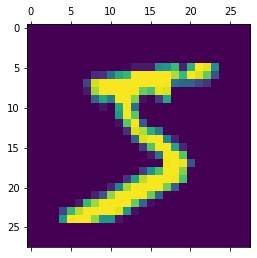

In [4]:
plt.matshow(x_train[0])
print("Actual Value: ",y_train[0])

In [5]:
# Creating a Simple Neural Network with no. of input neurons being 28*28
model_1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10,activation='sigmoid')])

model_1.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
                )

model_1.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 9.8851 - accuracy: 0.8396
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 6.0024 - accuracy: 0.8804
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.6523 - accuracy: 0.8833
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4909 - accuracy: 0.8844
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3964 - accuracy: 0.8874


In [6]:
# List of all Accuracies and Losses
Loss =[]
Accuracy=[]
Models = []
Loss.append(model_1.evaluate(x_test,y_test)[0])
Accuracy.append(model_1.evaluate(x_test, y_test)[1])
Models.append('model_1')

313/313 [==============================] - 0s 1ms/step - loss: 5.2623 - accuracy: 0.9023


The above training data has not been scaled. If we scale the above data we have high chances of getting greater accuracy. 

In [7]:
# Scaling by dividing the values in matrix with 255. Since 255 is the max value a grayscale pixle can have this scaling will bring all the values between 0 and 1.
x_train = x_train/255
x_test = x_test/255

In [8]:
from tensorflow.python import metrics
model_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10,activation='sigmoid')])

model_2.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_2.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4675 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9201
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9252


In [9]:
Loss.append(model_2.evaluate(x_test,y_test)[0])
Accuracy.append(model_2.evaluate(x_test,y_test)[1])
Models.append('model_2')

313/313 [==============================] - 0s 1ms/step - loss: 0.2689 - accuracy: 0.9256


Now, I will add a Hidden Layer to the existing network and see if it further increases the accuracy. 

In [10]:
adam_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')])

adam_model.compile(optimizer = 'Adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

adam_model.fit(x_train, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2314 - accuracy: 0.9329
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0943 - accuracy: 0.9717
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0622 - accuracy: 0.9808
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0452 - accuracy: 0.9860
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0319 - accuracy: 0.9901
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0262 - accuracy: 0.9913
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0194 - accuracy: 0.9939
Epoch 8/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0166 - accuracy: 0.9946


In [11]:
Loss.append(adam_model.evaluate(x_test,y_test)[0])
Accuracy.append(adam_model.evaluate(x_test,y_test)[1])
Models.append('adam_model')

313/313 [==============================] - 1s 2ms/step - loss: 0.0706 - accuracy: 0.9805


From this point onwards I will keep the structure and epochs of neural network constant and only vary the optimizers.

# **Adadelta Optimizer**

In [12]:
adadelta_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(250,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')])

adadelta_model.compile(optimizer='Adadelta',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

adadelta_model.fit(x_train, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1893 - accuracy: 0.1948
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 1.9476 - accuracy: 0.4636
Epoch 3/8
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7361 - accuracy: 0.6479
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5479 - accuracy: 0.7232
Epoch 5/8
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3825 - accuracy: 0.7593
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2408 - accuracy: 0.7788
Epoch 7/8
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1218 - accuracy: 0.7950
Epoch 8/8
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0229 - accuracy: 0.8072


In [13]:
Loss.append(adadelta_model.evaluate(x_test,y_test)[0])
Accuracy.append(adadelta_model.evaluate(x_test, y_test)[1])
Models.append('adadelta_model')

313/313 [==============================] - 1s 2ms/step - loss: 0.9597 - accuracy: 0.8206


# **Adagrad Optimizer**

In [14]:
adagrad_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])

adagrad_model.compile(optimizer='Adagrad',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

adagrad_model.fit(x_train, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0993 - accuracy: 0.7515
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5613 - accuracy: 0.8672
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4600 - accuracy: 0.8844
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4129 - accuracy: 0.8925
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3840 - accuracy: 0.8984
Epoch 6/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3636 - accuracy: 0.9033
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3480 - accuracy: 0.9065
Epoch 8/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3355 - accuracy: 0.9098


In [15]:
Loss.append(adagrad_model.evaluate(x_test,y_test)[0])
Accuracy.append(adagrad_model.evaluate(x_test, y_test)[1])
Models.append('adagrad_model')

313/313 [==============================] - 1s 2ms/step - loss: 0.3151 - accuracy: 0.9150


# **Adamax Optimizer**

In [16]:
adamax_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])

adamax_model.compile(optimizer='Adagrad',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

adamax_model.fit(x_train, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1024 - accuracy: 0.7585
Epoch 2/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5607 - accuracy: 0.8691
Epoch 3/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4585 - accuracy: 0.8848
Epoch 4/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4112 - accuracy: 0.8929
Epoch 5/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3822 - accuracy: 0.8985
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3620 - accuracy: 0.9027
Epoch 7/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3466 - accuracy: 0.9062
Epoch 8/8
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3343 - accuracy: 0.9089


In [17]:
Loss.append(adamax_model.evaluate(x_test,y_test)[0])
Accuracy.append(adamax_model.evaluate(x_test,y_test)[1])
Models.append('adamax_model')

313/313 [==============================] - 1s 2ms/step - loss: 0.3146 - accuracy: 0.9154


# **Nadam Optimizer**

In [18]:
nadam_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])

nadam_model.compile(optimizer='Nadam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

nadam_model.fit(x_train, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2275 - accuracy: 0.9355
Epoch 2/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0950 - accuracy: 0.9716
Epoch 3/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0621 - accuracy: 0.9811
Epoch 4/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0450 - accuracy: 0.9861
Epoch 5/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0333 - accuracy: 0.9894
Epoch 6/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0249 - accuracy: 0.9920
Epoch 7/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0203 - accuracy: 0.9935
Epoch 8/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0160 - accuracy: 0.9947


In [19]:
Loss.append(nadam_model.evaluate(x_test,y_test)[0])
Accuracy.append(nadam_model.evaluate(x_test, y_test)[1])
Models.append('nadam_model')

313/313 [==============================] - 1s 2ms/step - loss: 0.0756 - accuracy: 0.9796


# **Ftrl Optimizer**

In [20]:
ftrl_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])

ftrl_model.compile(optimizer='Ftrl',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

ftrl_model.fit(x_train, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3021 - accuracy: 0.1121
Epoch 2/8
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2614 - accuracy: 0.2385
Epoch 3/8
1875/1875 [==============================] - 9s 5ms/step - loss: 1.8315 - accuracy: 0.4380
Epoch 4/8
1875/1875 [==============================] - 7s 4ms/step - loss: 1.2451 - accuracy: 0.6643
Epoch 5/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9518 - accuracy: 0.7395
Epoch 6/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7978 - accuracy: 0.7817
Epoch 7/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6993 - accuracy: 0.8088
Epoch 8/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6316 - accuracy: 0.8279


In [21]:
Loss.append(ftrl_model.evaluate(x_test,y_test)[0])
Accuracy.append(ftrl_model.evaluate(x_test,y_test)[1])
Models.append('ftrl_model')

313/313 [==============================] - 1s 2ms/step - loss: 0.5866 - accuracy: 0.8396


# **RMSprop Optimizer**

In [22]:
rmsprop_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')])

rmsprop_model.compile(optimizer='RMSprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

rmsprop_model.fit(x_train, y_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2247 - accuracy: 0.9345
Epoch 2/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0999 - accuracy: 0.9711
Epoch 3/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0734 - accuracy: 0.9791
Epoch 4/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0579 - accuracy: 0.9836
Epoch 5/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0481 - accuracy: 0.9869
Epoch 6/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0393 - accuracy: 0.9896
Epoch 7/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0333 - accuracy: 0.9909
Epoch 8/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0286 - accuracy: 0.9922


In [23]:
Loss.append(rmsprop_model.evaluate(x_test,y_test)[0])
Accuracy.append(rmsprop_model.evaluate(x_test,y_test)[1])
Models.append('rmsprop_model')

313/313 [==============================] - 1s 2ms/step - loss: 0.0955 - accuracy: 0.9789


# **Final Plots to Compare Accuracy and Loss of every Model**

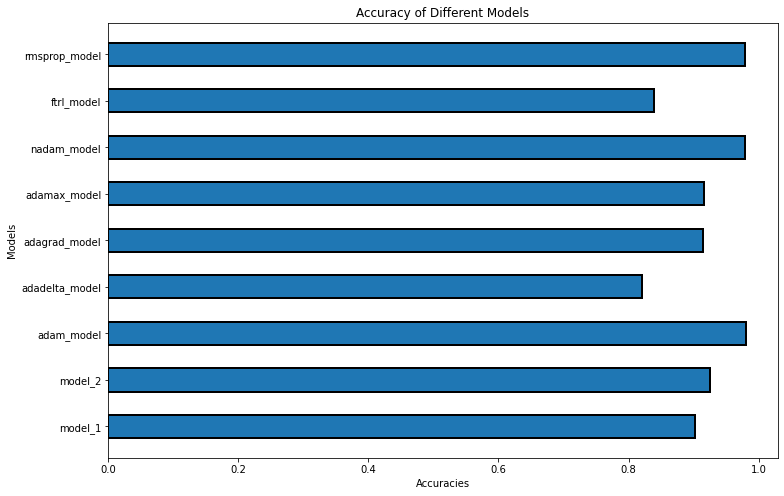

In [41]:
plt.figure(figsize=(12,8))
plt.title('Accuracy of Different Models')
plt.xlabel('Accuracies')
plt.ylabel('Models')
plt.barh(Models,Accuracy, height=0.5, edgecolor='black', linewidth=2)
plt.show()

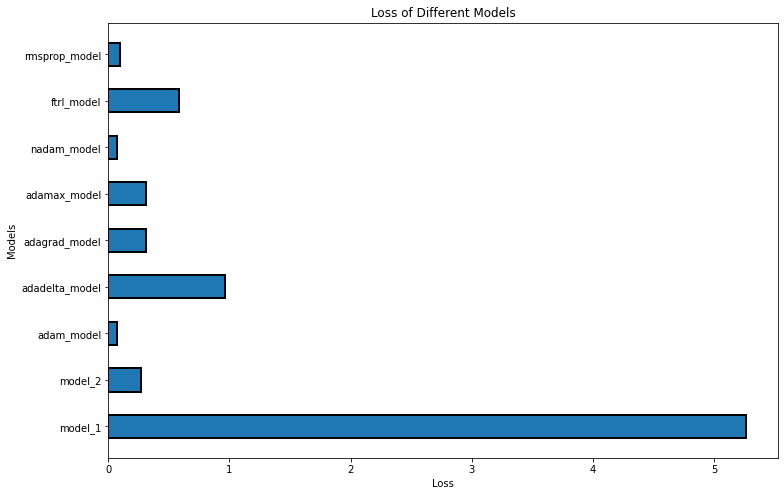

In [43]:
plt.figure(figsize=(12,8))
plt.title('Loss of Different Models')
plt.xlabel('Loss')
plt.ylabel('Models')
plt.barh(Models,Loss, height=0.5, edgecolor='black', linewidth=2)
plt.show()

Based on above graphs the adam, nadam, rmsprop show the heighest of accuracies and the lowest of the losses.